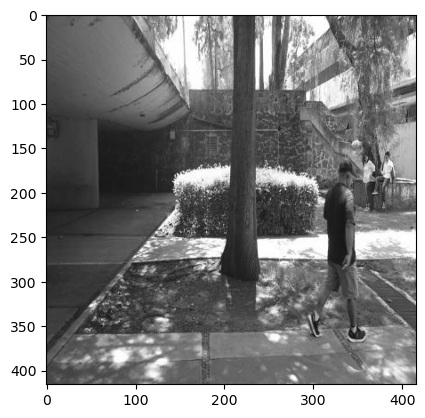

In [18]:
import sys
import os

# Añade el path relativo al src/   temporal porque el json de los cojones no me funciona o no se como funciona
sys.path.append(os.path.abspath("../src")) 

import cv2
import numpy as np
import matplotlib.pyplot as plt
import algoritmos.harris as hs

img = cv2.imread('../src/images/test/MOV_0578_mp4-3_jpg.rf.df2744776ec26f567ca1b0a80a38424e.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
##################################### HARRIS DETECTION ALGORITHM #########################################
gaussbox=3
k=0.04
threshold=0.05
window_size=5

algo_hs = hs.harris_detect(gaussbox,k,threshold,window_size)

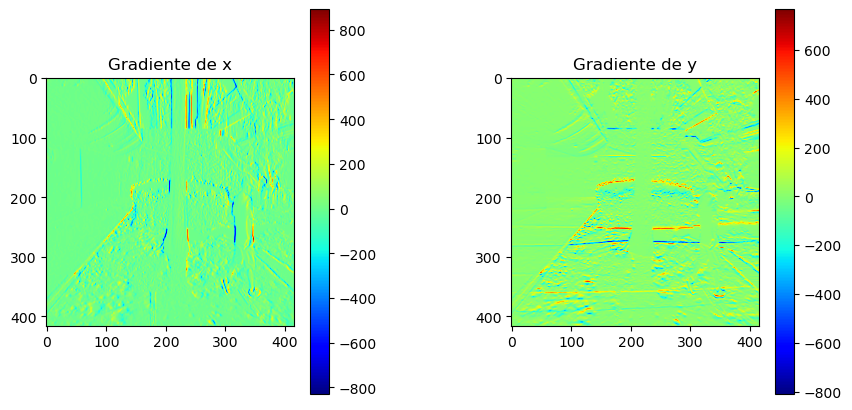

In [20]:
Ix, Iy = algo_hs.calc_grad(img)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(Ix, cmap='jet') 
plt.colorbar()
plt.title("Gradiente de x")

plt.subplot(1,2,2)
plt.imshow(Iy, cmap='jet') 
plt.colorbar()
plt.title("Gradiente de y")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [21]:
Ix2, Iy2, Ixy = algo_hs.calc_grad_prod(Ix,Iy)
algo_hs.gauss_filter(Ix2, Iy2, Ixy, gaussbox)

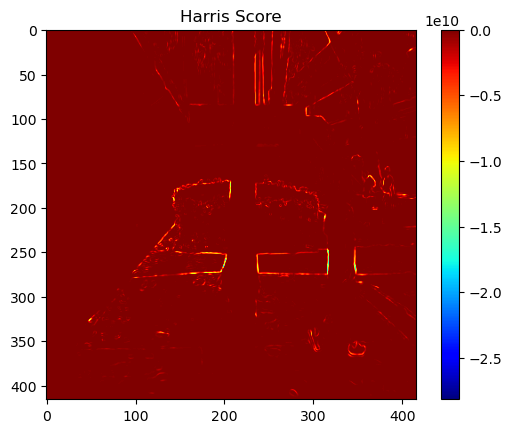

In [22]:
R = algo_hs.calc_harris_score(Ix2,Iy2,Ixy)

plt.imshow(R, cmap='jet') 
plt.colorbar()
plt.title("Harris Score")
plt.show()

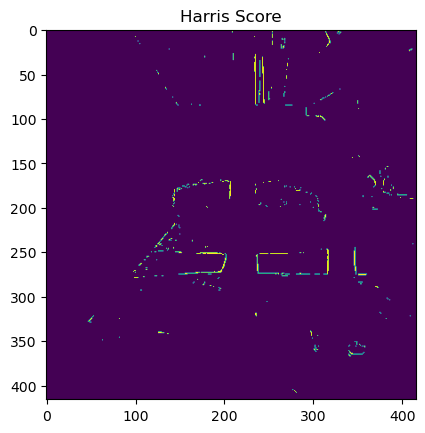

In [23]:
R_norm = algo_hs.normalize_thresh(R)

plt.imshow(R_norm) 
plt.title("Harris Score")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-57184670.0..109755630.0].


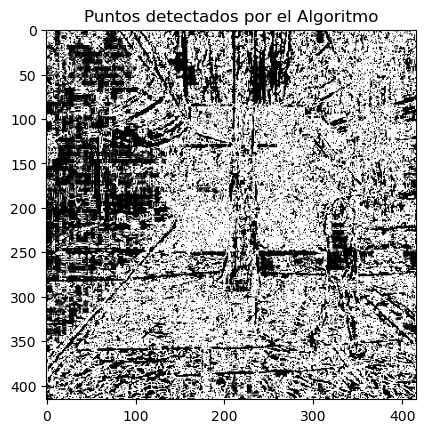

In [ ]:
img3 = cv2.cornerHarris(np.float32(img), 2, 3, 0.04) 


print()

strongest_corners = algo_hs.non_max_supre(R_norm,img)

#img2 = algo_hs.draw_corner(R_norm,img)
img2 = algo_hs.draw_corner_p(strongest_corners,img)

algo_hs.draw_img(img2)

